In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
data = pd.read_csv(r"C:\Users\shyam it services\Downloads\Titanic.csv")

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
data=data.drop('Cabin',axis=1)

In [13]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [16]:
categories={"female":1,"male":0}
data['Sex']=data['Sex'].map(categories)

In [17]:
categories={'Q':1,'S':2,'C':3}
data['Embarked']=data['Embarked'].map(categories)

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2.0


In [19]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

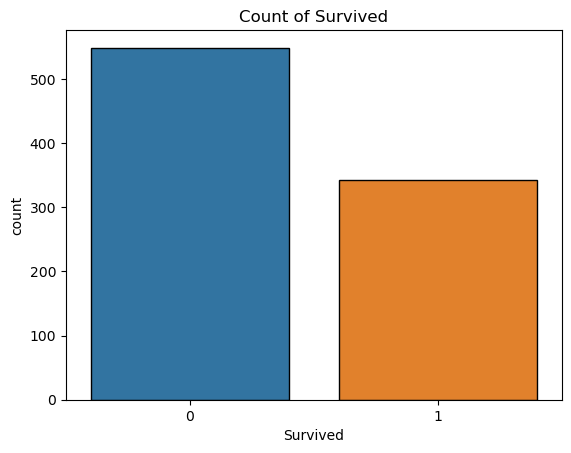

In [20]:
sns.countplot(x='Survived',edgecolor='black',data=data)
plt.title('Count of Survived')
plt.show()

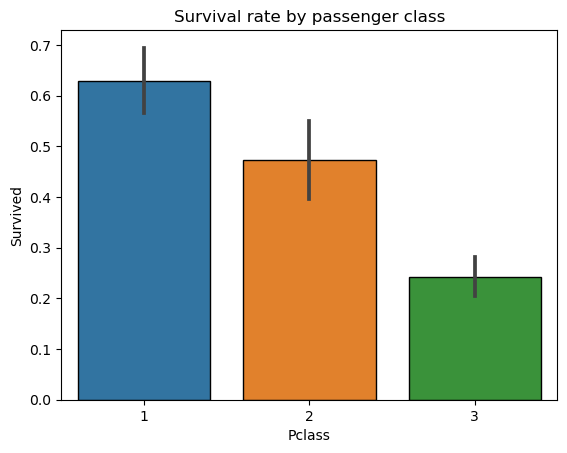

In [21]:
sns.barplot(x='Pclass',y='Survived',edgecolor='black',data=data)
plt.title('Survival rate by passenger class')
plt.show()

In [22]:
x=data[(data['Survived']==1)&(data['Pclass']==1)].shape[0]
y=data[data['Pclass']==1].shape[0]
print(x/y)

0.6296296296296297


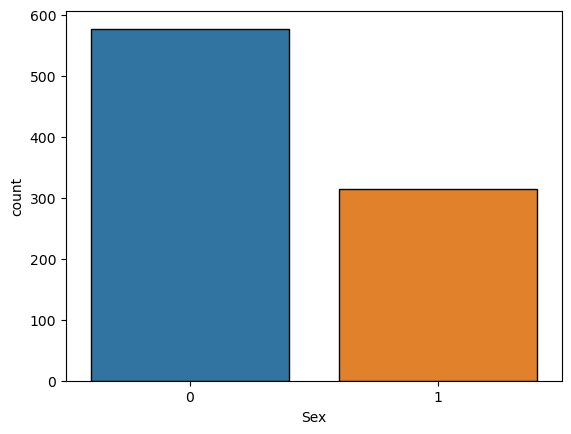

In [23]:
sns.countplot(x='Sex',edgecolor='black',data=data)
plt.title('')
plt.show()

percentage of female who survived: Survived
1    0.742038
0    0.257962
Name: proportion, dtype: float64
percentage of male who survived: Survived
0    0.811092
1    0.188908
Name: proportion, dtype: float64


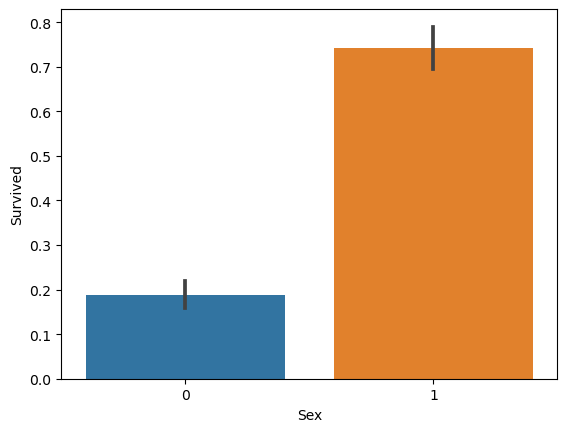

In [24]:
sns.barplot(x='Sex',y='Survived',data=data)
print("percentage of female who survived:",data["Survived"][data["Sex"]==1].value_counts(normalize=True))
print("percentage of male who survived:",data["Survived"][data["Sex"]==0].value_counts(normalize=True))

percentage of Pclass_1 who survived: Survived
1    0.742038
0    0.257962
Name: proportion, dtype: float64
percentage of Pclass_2 who survived: Series([], Name: proportion, dtype: float64)
percentage of Pclass_3 who survived: Series([], Name: proportion, dtype: float64)


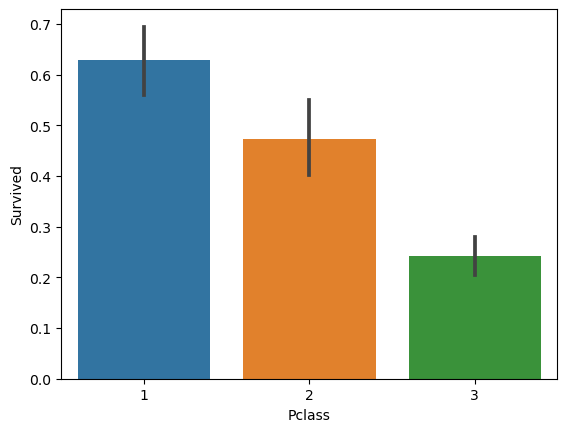

In [25]:
sns.barplot(x='Pclass',y='Survived',data=data)
print("percentage of Pclass_1 who survived:",data["Survived"][data["Sex"]==1].value_counts(normalize=True))
print("percentage of Pclass_2 who survived:",data["Survived"][data["Sex"]==2].value_counts(normalize=True))
print("percentage of Pclass_3 who survived:",data["Survived"][data["Sex"]==3].value_counts(normalize=True))

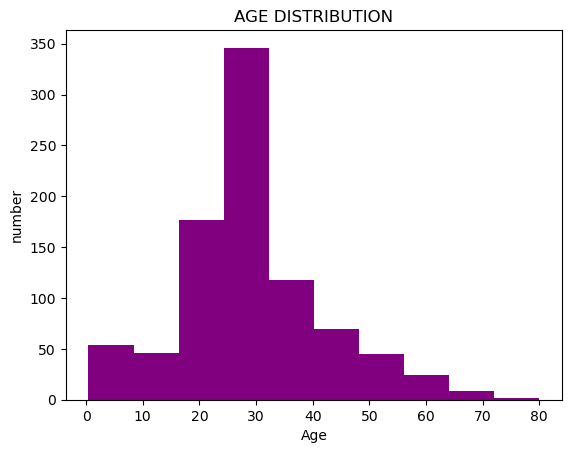

In [28]:
plt.hist(data['Age'].dropna(),color='purple')
plt.title('AGE DISTRIBUTION')
plt.xlabel('Age')
plt.ylabel('number')
plt.show()

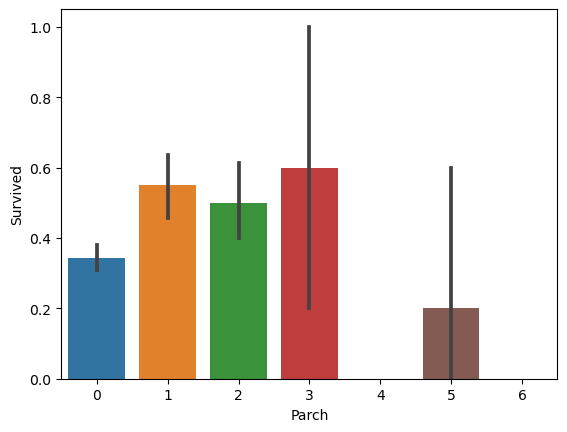

In [29]:
sns.barplot(x='Parch',y='Survived',data=data)
plt.show()

In [30]:
data.dropna(subset=['Embarked','Fare','Ticket'],inplace=True)

In [31]:
x=data.drop(['Survived','Ticket','Name','PassengerId'],axis=1)
y=data['Survived']

In [32]:
from sklearn.preprocessing import StandardScaler
mns=StandardScaler()
X=pd.DataFrame(mns.fit_transform(x))

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [35]:
X.head()

,0,1,2,3,4,5,6
0,0.825209,-0.735342,-0.590495,0.431350,-0.474326,-0.500240,-0.198804
1,-1.572211,1.359911,0.643971,0.431350,-0.474326,0.788947,1.743356
2,0.825209,1.359911,-0.281878,-0.475199,-0.474326,-0.486650,-0.198804
3,-1.572211,1.359911,0.412509,0.431350,-0.474326,0.422861,-0.198804
4,0.825209,-0.735342,0.412509,-0.475199,-0.474326,-0.484133,-0.198804


In [36]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (711, 7)
Shape of X_test:  (178, 7)


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier 

In [38]:
LR=LogisticRegression(random_state=0)
cv=cross_val_score(LR,X_train,y_train,cv=10)
print(cv)
print(cv.mean())

[0.875      0.74647887 0.88732394 0.87323944 0.76056338 0.81690141
 0.77464789 0.71830986 0.85915493 0.84507042]
0.815669014084507


In [39]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)
xpre2=model.predict(X_train)
print(accuracy_score(xpre2,y_train))

0.8762306610407876


In [40]:
RF=RandomForestClassifier()
cv=cross_val_score(RF,X_train,y_train,cv=10)
print(cv)
print(cv.mean())

[0.875      0.76056338 0.88732394 0.87323944 0.78873239 0.83098592
 0.69014085 0.76056338 0.85915493 0.84507042]
0.8170774647887324
